Comparison between sparseSpACE and SG++

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution {(1, 4): array([0.43916611, 0.58435441, 1.06160883, 0.69587291, 0.55523991,
       0.85168678, 0.66341267, 1.05842503, 1.3470377 , 2.81307219,
       2.73257228, 3.63608515, 0.93922138, 0.82320348, 0.27541761]), (2, 3): array([ 3.29102655e+00,  3.02570859e+00,  1.88897083e+00, -1.49001360e-01,
        2.18014307e-01,  7.04932707e-02,  1.13040525e-01, -8.51883809e-01,
       -7.07284197e-01, -5.06248319e-03,  1.12491570e+00, -7.79598860e-01,
       -2.65802834e-01, -4.54422584e-01,  2.12798939e-01,  1.78056178e-01,
       -3.00983278e-03,  4.58961946e-01,  8.00177585e+00,  8.70169914e+00,
        1.75363995e+00]), (3, 2): array([ 9.14830807, -1.1245658 ,  0.27397276, -0.04299733,  0.80027983,
       -0.14572571,  0.63679431, -0.15821647, -0.07618344, -0.14122351,
        0.7848801 ,  0.30429538, -0.23570407,  1.48653019,  2.2995021 ,
       -0.48445953,  1.86754433,  7.3555984 , -

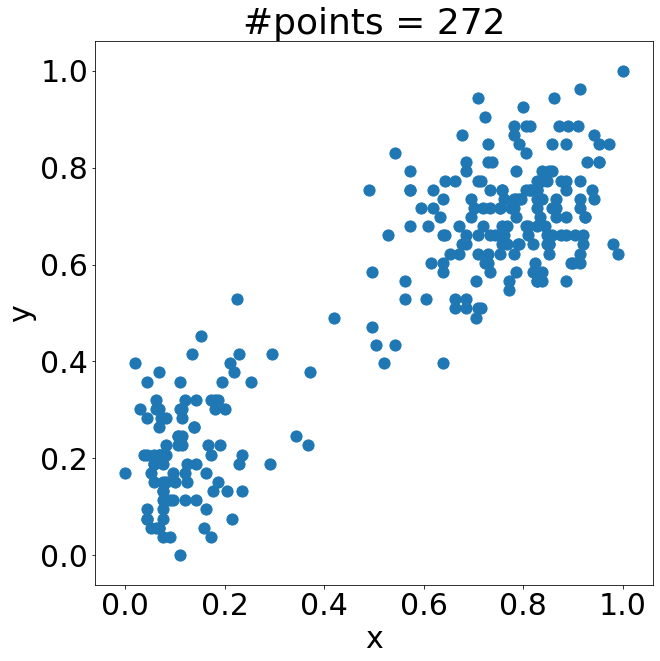

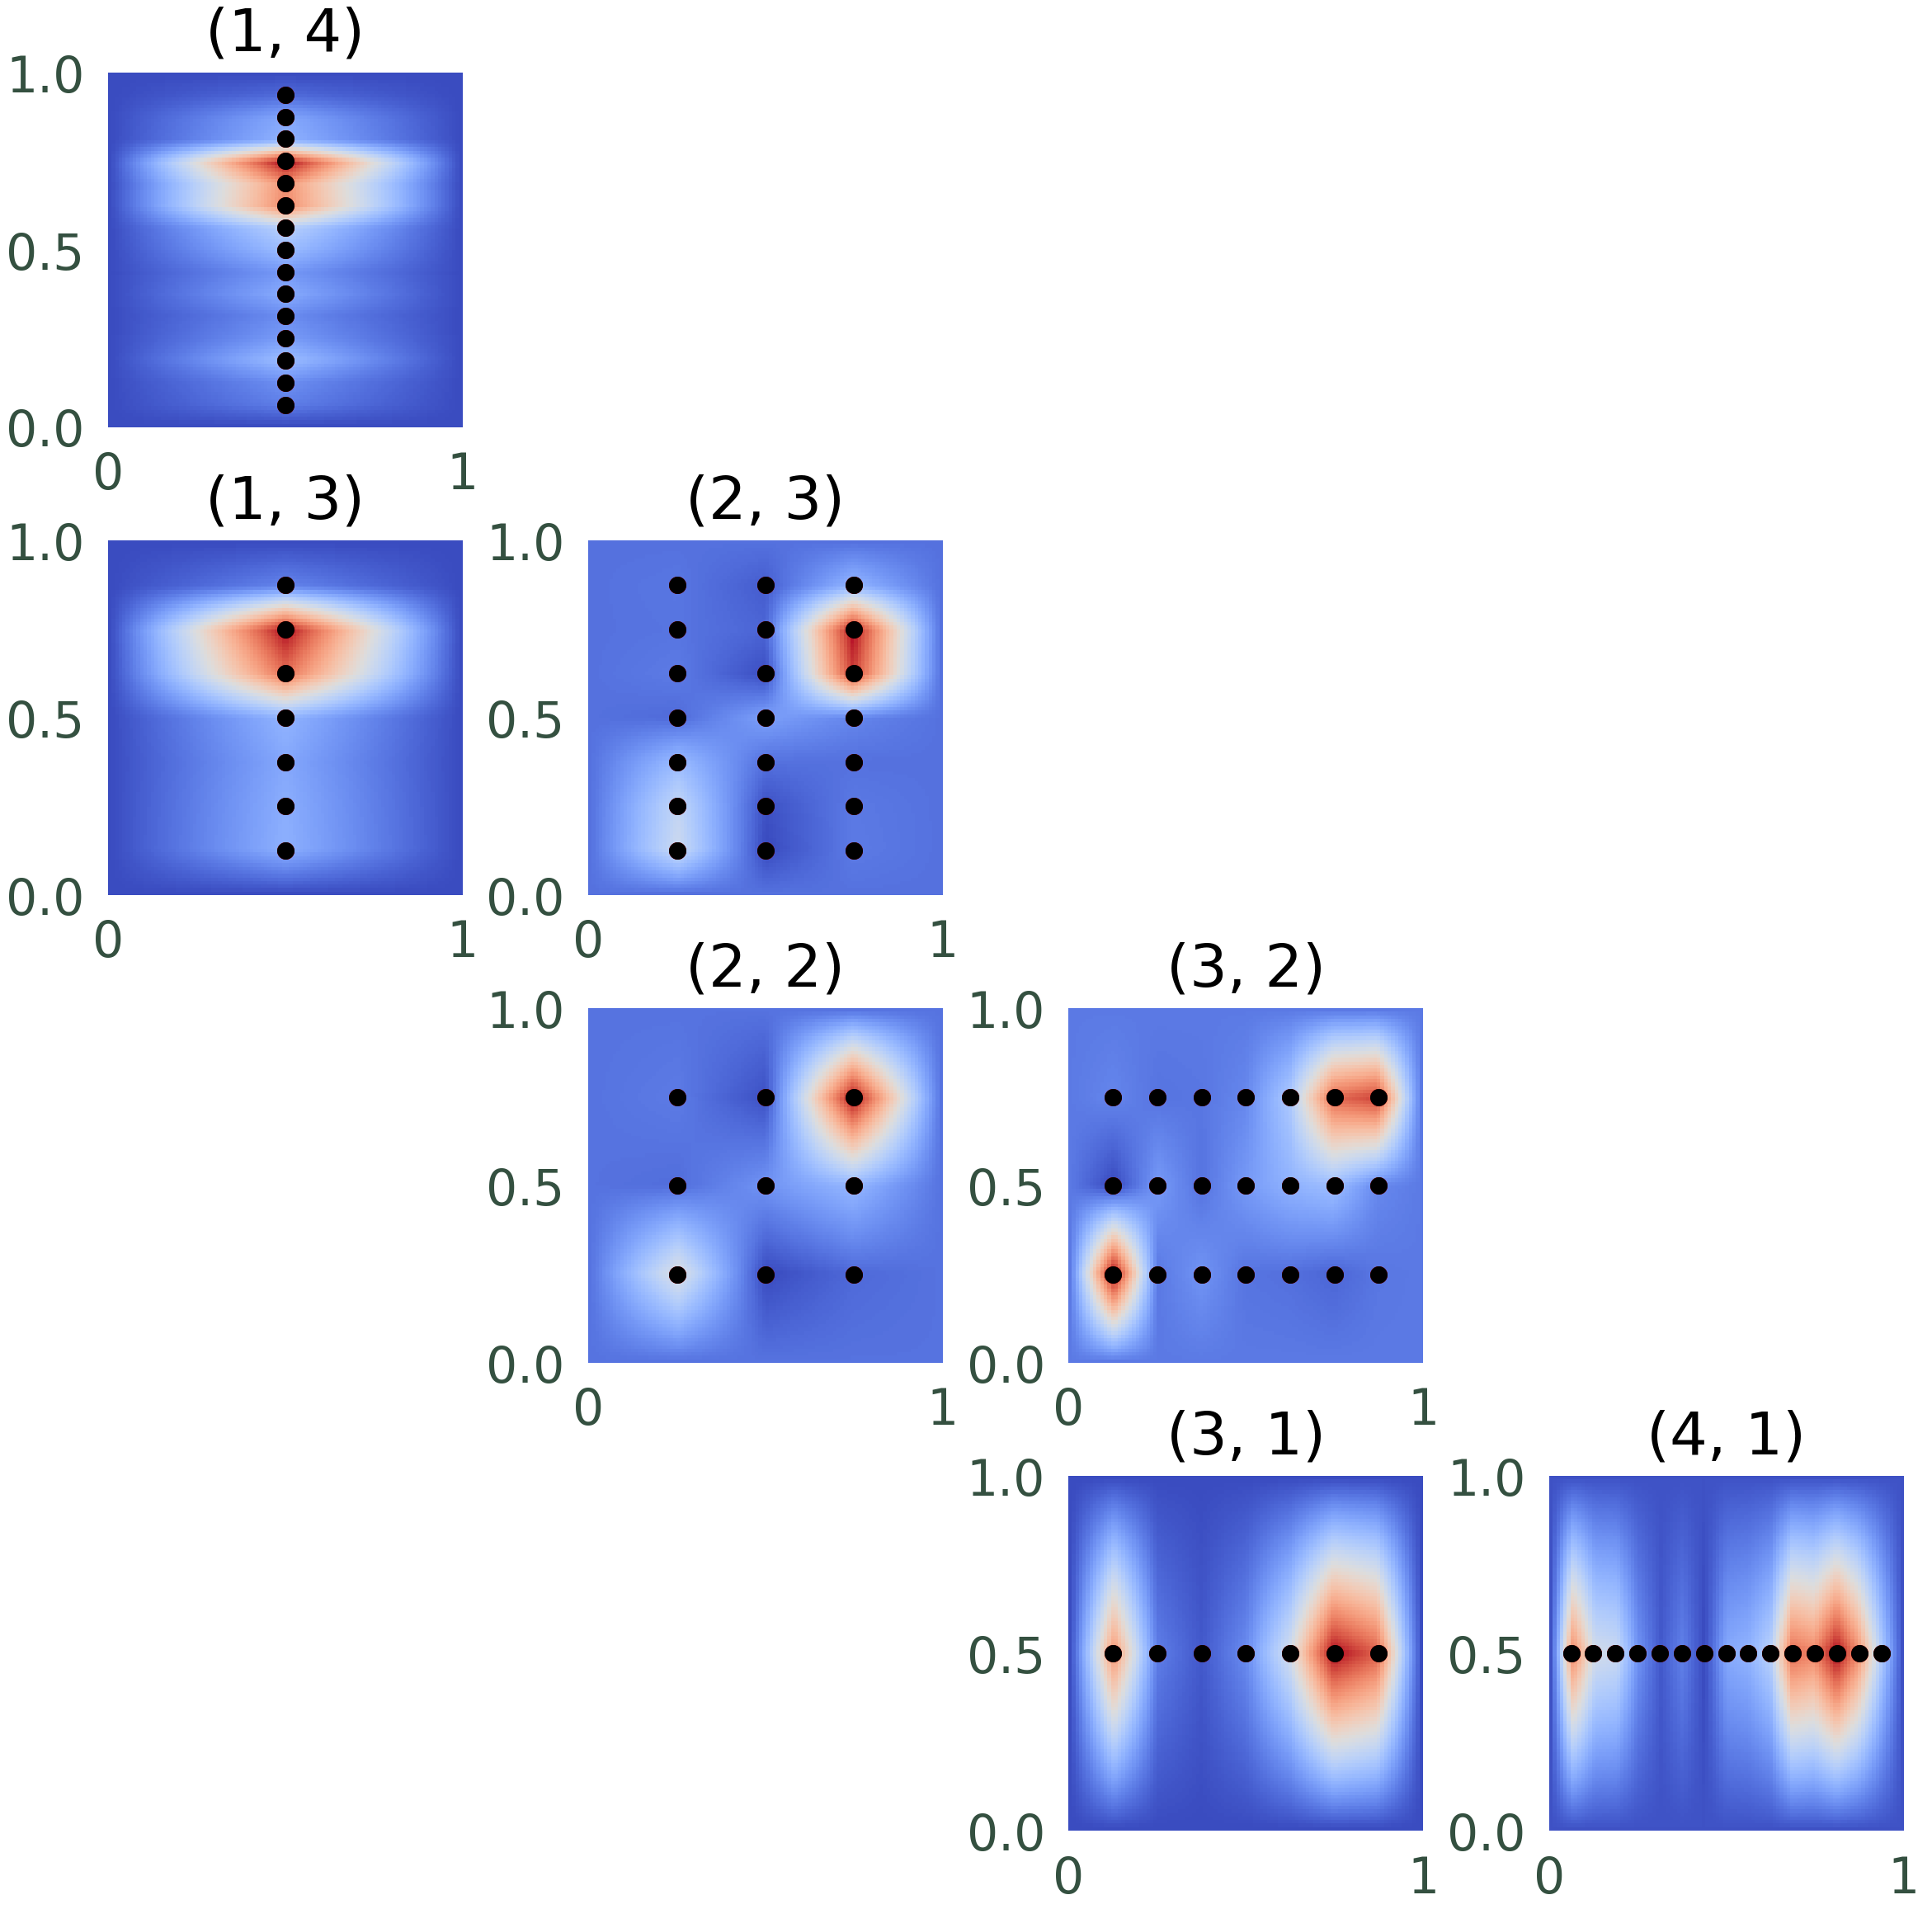

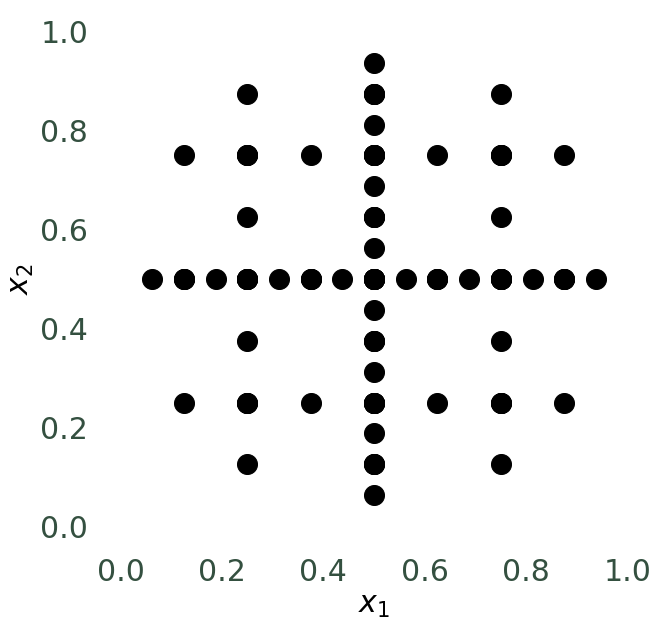

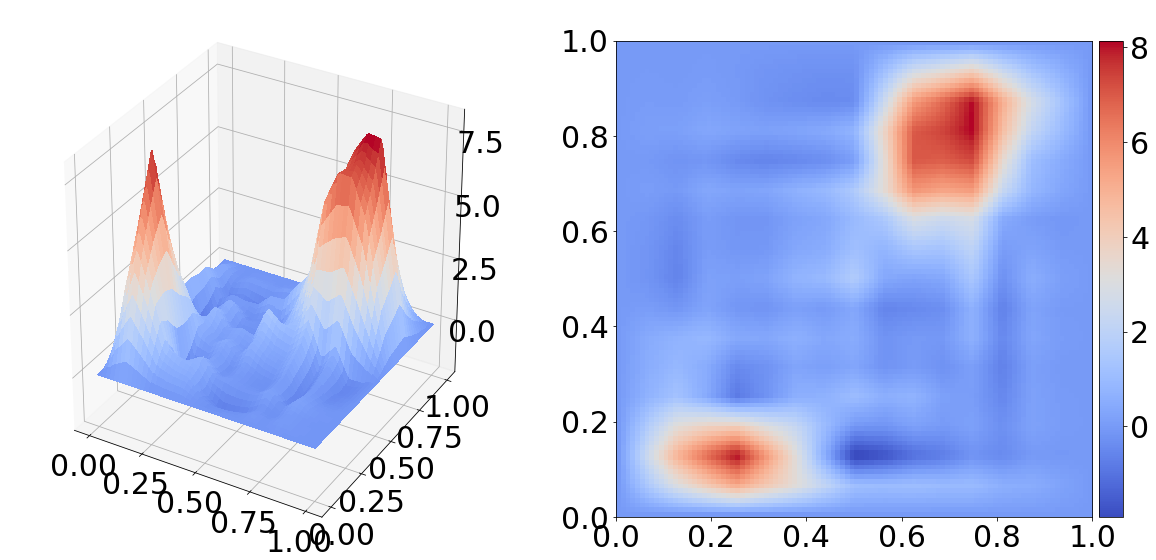

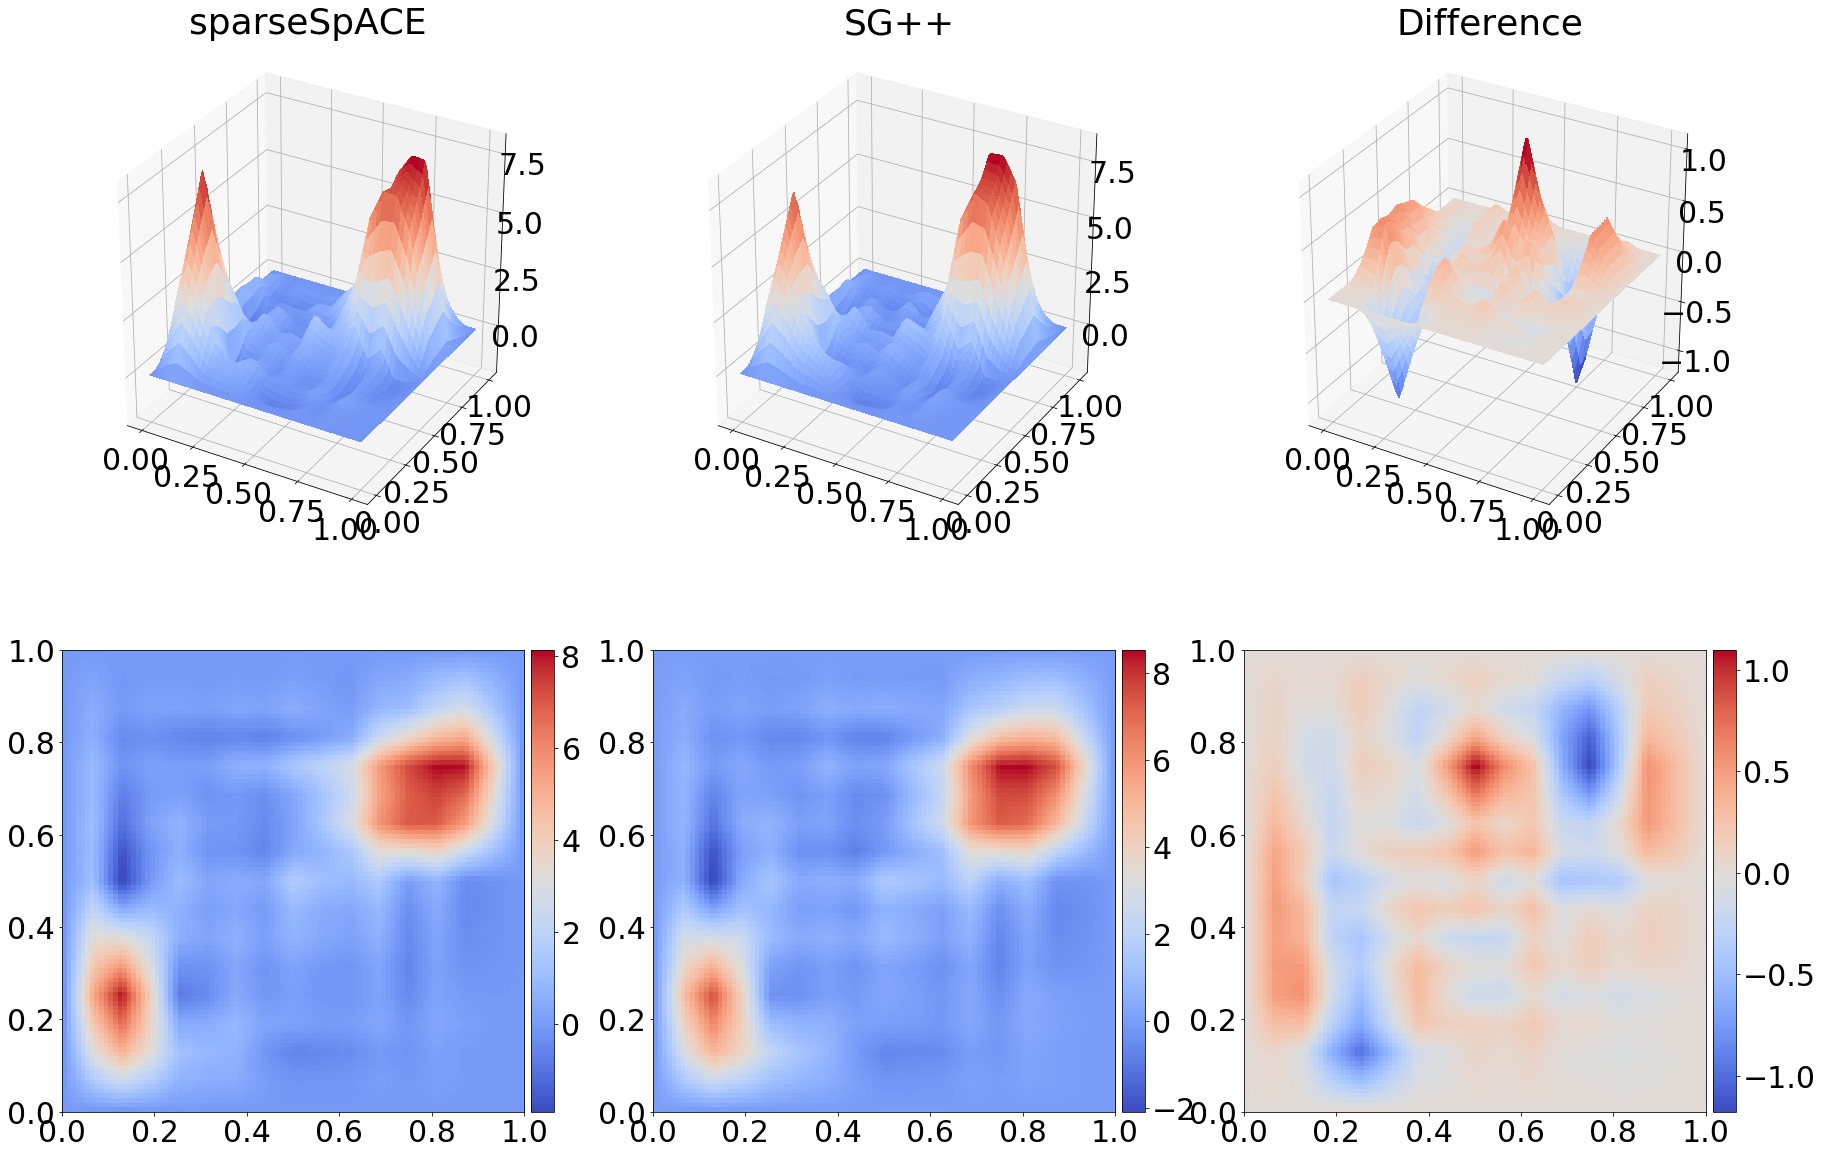

In [1]:
from sys import path
%matplotlib inline
path.append('../src/')
import numpy as np
from ErrorCalculator import *
from GridOperation import *
from StandardCombi import *
from sklearn import datasets
from SGppCompare import plot_comparison

# dimension of the problem
dim = 2

# define number of samples
size = 500

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define data (https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)
# random floats
# data = np.random.random((size, dim))

# samples from the standard exponential distribution.
# data = np.random.standard_exponential((size, dim))

# samples from the standard exponential distribution
# data = np.random.standard_normal((size, dim))

# multivariate normal distribution
# mean = [0, 0]
# cov = [[1, 0], [0, 100]]
# data = np.random.multivariate_normal(mean, cov, size)

# scikit learn datasets
# data = datasets.make_moons(size)
# data = datasets.make_circles(size)

# csv dataset file
data = "Datasets/faithful.csv"
# SGpp values for dataset
values = "Values/config_basicDensityEstimation_Faithful.csv"

# define operation to be performed
operation = DensityEstimation(data, dim, print_output=False)

# create the combiObject and initialize it with the operation
combiObject = StandardCombi(a, b, operation=operation, print_output=False)

# define level of combigrid
minimum_level = 1
maximum_level = 4

# perform the density estimation operation, has to be done before the printing and plotting
combiObject.perform_operation(minimum_level, maximum_level)

print("Plot of dataset:")
operation.plot_dataset("Figures/dataset_" + data[9:-4] + ".png")

print("Combination Scheme:")
# when you pass the operation the function also plots the contour plot of each component grid
combiObject.print_resulting_combi_scheme("Figures/combiScheme_" + data[9:-4] + ".png", operation=operation)

print("Sparse Grid:")
combiObject.print_resulting_sparsegrid("Figures/sparseGrid_" + data[9:-4] + "_" + str(minimum_level) + "_" + str(maximum_level) + ".png",
                                       markersize=20)

print("Plot of density estimation")
# when contour = True, the contour plot is shown next to the 3D plot
combiObject.plot("Figures/DEplot_" + data[9:-4] + ".png", contour=True)

print("Plot of comparison between sparseSpACE and SG++")
# plot comparison between sparseSpACE and SG++ result
plot_comparison(dim=dim, data=data, values=values, combiObject=combiObject, plot_data=False, minimum_level=minimum_level,
                maximum_level=maximum_level,
                pointsPerDim=100)
